[参考](https://qiita.com/nymwa/items/9963968568b9dbfc2e78)

# 60

In [1]:
from gensim.models import KeyedVectors

In [2]:
# 初回のみ
#model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)
#model.save('GoogleNews-vectors-negative300.kv')

In [3]:
model = KeyedVectors.load('GoogleNews-vectors-negative300.kv', mmap='r')

In [4]:
model["United_States"]

memmap([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,
         1.74804688e-01, -1.46484375e-01, -7.42187500e-02,
        -1.01562500e-01, -7.71484375e-02,  1.09375000e-01,
        -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
         1.74804688e-01, -7.71484375e-02,  2.58789062e-02,
        -7.66601562e-02, -3.80859375e-02,  1.35742188e-01,
         3.75976562e-02, -4.19921875e-02, -3.56445312e-02,
         5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
        -1.17187500e-01,  1.41601562e-01, -1.69921875e-01,
        -6.49414062e-02, -1.66992188e-01,  1.00585938e-01,
         1.15722656e-01, -2.18750000e-01, -9.86328125e-02,
        -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
        -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,
         8.15429688e-02,  6.88476562e-02,  1.87500000e-01,
         6.49414062e-02,  1.15234375e-01, -2.27050781e-02,
         3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
        -2.08007812e-01,  4.54101562e-02, -1.23901367e-0

# 61

In [5]:
model.similarity("United_States", "U.S.")

0.73107743

# 62

In [6]:
import numpy as np
import pandas as pd

In [7]:
simularities = model.most_similar("United_States")
pd.DataFrame(
    simularities,
    columns = ['単語', '類似度'],
    index = np.arange(len(simularities)) + 1
)

,単語,類似度
1,Unites_States,0.787725
2,Untied_States,0.754137
3,United_Sates,0.740072
4,U.S.,0.731077
5,theUnited_States,0.640439
6,America,0.617841
7,UnitedStates,0.616731
8,Europe,0.613299
9,countries,0.604480
10,Canada,0.601907


# 63

In [8]:
simularities = model.most_similar(positive=['Spain', 'Athens'], negative=['Madird'])
pd.DataFrame(
    simularities,
    columns = ['単語', '類似度'],
    index = np.arange(len(simularities)) + 1
)

,単語,類似度
1,Greece,0.601512
2,Athens_Greece,0.576344
3,Thessaloniki,0.508480
4,Greeks,0.487150
5,Greek,0.470217
6,Lithuania,0.466966
7,Mykonos_Island,0.463594
8,Iraklion,0.456735
9,Organising_Committee_ATHOC,0.456457
10,Rome,0.450400


In [9]:
with open('questions-words.txt') as f:
    lines = f.read().splitlines()
    
lines

[': capital-common-countries',
 'Athens Greece Baghdad Iraq',
 'Athens Greece Bangkok Thailand',
 'Athens Greece Beijing China',
 'Athens Greece Berlin Germany',
 'Athens Greece Bern Switzerland',
 'Athens Greece Cairo Egypt',
 'Athens Greece Canberra Australia',
 'Athens Greece Hanoi Vietnam',
 'Athens Greece Havana Cuba',
 'Athens Greece Helsinki Finland',
 'Athens Greece Islamabad Pakistan',
 'Athens Greece Kabul Afghanistan',
 'Athens Greece London England',
 'Athens Greece Madrid Spain',
 'Athens Greece Moscow Russia',
 'Athens Greece Oslo Norway',
 'Athens Greece Ottawa Canada',
 'Athens Greece Paris France',
 'Athens Greece Rome Italy',
 'Athens Greece Stockholm Sweden',
 'Athens Greece Tehran Iran',
 'Athens Greece Tokyo Japan',
 'Baghdad Iraq Bangkok Thailand',
 'Baghdad Iraq Beijing China',
 'Baghdad Iraq Berlin Germany',
 'Baghdad Iraq Bern Switzerland',
 'Baghdad Iraq Cairo Egypt',
 'Baghdad Iraq Canberra Australia',
 'Baghdad Iraq Hanoi Vietnam',
 'Baghdad Iraq Havana Cuba

In [10]:
dataset = []
category = None
for line in lines:
    if line[0] == ':':
        category = line[2:]
    else:
        lst = [category] + line.split(' ')
        dataset.append(lst)

In [11]:
pd.DataFrame(dataset)

,0,1,2,3,4
0,capital-common-countries,Athens,Greece,Baghdad,Iraq
1,capital-common-countries,Athens,Greece,Bangkok,Thailand
2,capital-common-countries,Athens,Greece,Beijing,China
3,capital-common-countries,Athens,Greece,Berlin,Germany
4,capital-common-countries,Athens,Greece,Bern,Switzerland
...,...,...,...,...,...
19539,gram9-plural-verbs,write,writes,talk,talks
19540,gram9-plural-verbs,write,writes,think,thinks
19541,gram9-plural-verbs,write,writes,vanish,vanishes
19542,gram9-plural-verbs,write,writes,walk,walks


In [12]:
# from tqdm import tqdm

In [13]:
#for i, lst in enumerate(tqdm(dataset)):
#    pred, prob = model.most_similar(positive = [lst[2], lst[3]], negative = [lst[1]], topn = 1)[0]
#    dataset[i].append(pred)
#    dataset[i].append(prob)

In [14]:
#pd.DataFrame(dataset[:10])

In [15]:
#with open('questions-words_result.txt', 'w') as f:
#    for line in dataset:
#        f.writelines(" ".join(line[:-1])+" {}".format(str(line[6]))+"\n")

In [16]:
dataset = []
with open('./questions-words_result.txt') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('\n', '')
        line = line.split(' ')
        line[6] = float(line[6])
        dataset.append(line)

In [17]:
pd.DataFrame(dataset[:10])

,0,1,2,3,4,5,6
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi,0.635187
1,capital-common-countries,Athens,Greece,Bangkok,Thailand,Thailand,0.713767
2,capital-common-countries,Athens,Greece,Beijing,China,China,0.723578
3,capital-common-countries,Athens,Greece,Berlin,Germany,Germany,0.673462
4,capital-common-countries,Athens,Greece,Bern,Switzerland,Switzerland,0.491975
5,capital-common-countries,Athens,Greece,Cairo,Egypt,Egypt,0.752781
6,capital-common-countries,Athens,Greece,Canberra,Australia,Australia,0.583733
7,capital-common-countries,Athens,Greece,Hanoi,Vietnam,Viet_Nam,0.627634
8,capital-common-countries,Athens,Greece,Havana,Cuba,Cuba,0.646099
9,capital-common-countries,Athens,Greece,Helsinki,Finland,Finland,0.689998


# 65

In [18]:
semantic_analogy = [lst[-3:-1] for lst in dataset if not lst[0].startswith('gram')]
syntactic_analogy = [lst[-3:-1] for lst in dataset if lst[0].startswith('gram')]

In [19]:
acc = np.mean([true == pred for true, pred in semantic_analogy])
print('意味的アナロジー　正解率:', acc)

意味的アナロジー　正解率: 0.7308602999210734


In [20]:
acc = np.mean([true == pred for true, pred in syntactic_analogy])
print('文法的アナロジー　正解率:', acc)

文法的アナロジー　正解率: 0.7400468384074942


# 66

In [21]:
with open('./wordsim353/combined.csv') as f:
    data = f.read()

data = data.splitlines()
data = [line.split(',') for line in data]
data = data[1:]
data

[['love', 'sex', '6.77'],
 ['tiger', 'cat', '7.35'],
 ['tiger', 'tiger', '10.00'],
 ['book', 'paper', '7.46'],
 ['computer', 'keyboard', '7.62'],
 ['computer', 'internet', '7.58'],
 ['plane', 'car', '5.77'],
 ['train', 'car', '6.31'],
 ['telephone', 'communication', '7.50'],
 ['television', 'radio', '6.77'],
 ['media', 'radio', '7.42'],
 ['drug', 'abuse', '6.85'],
 ['bread', 'butter', '6.19'],
 ['cucumber', 'potato', '5.92'],
 ['doctor', 'nurse', '7.00'],
 ['professor', 'doctor', '6.62'],
 ['student', 'professor', '6.81'],
 ['smart', 'student', '4.62'],
 ['smart', 'stupid', '5.81'],
 ['company', 'stock', '7.08'],
 ['stock', 'market', '8.08'],
 ['stock', 'phone', '1.62'],
 ['stock', 'CD', '1.31'],
 ['stock', 'jaguar', '0.92'],
 ['stock', 'egg', '1.81'],
 ['fertility', 'egg', '6.69'],
 ['stock', 'live', '3.73'],
 ['stock', 'life', '0.92'],
 ['book', 'library', '7.46'],
 ['bank', 'money', '8.12'],
 ['wood', 'forest', '7.73'],
 ['money', 'cash', '9.15'],
 ['professor', 'cucumber', '0.31'],

In [22]:
for i, lst in enumerate(data):
    lst[2] = float(lst[2])
    sim = model.similarity(lst[0], lst[1])
    data[i].append(sim)

In [23]:
pd.DataFrame(
    data[:10],
    columns = ['単語1', '単語2', '人間', 'ベクトル']
)

,単語1,単語2,人間,ベクトル
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392
5,computer,internet,7.58,0.406862
6,plane,car,5.77,0.377970
7,train,car,6.31,0.340256
8,telephone,communication,7.50,0.332184
9,television,radio,6.77,0.611497


In [24]:
%matplotlib inline
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [25]:
def rank(x):
    args = np.argsort(-np.array(x))
    rank = np.empty_like(args)
    rank[args] = np.arange(len(x))
    return rank

In [26]:
human = [lst[2] for lst in data]
w2v = [lst[3] for lst in data]
human_rank = rank(human)
w2v_rank = rank(w2v)
rho, p_value = spearmanr(human_rank, w2v_rank)

In [27]:
print('順位相関係数 :', rho)
print('p値 :', p_value)

順位相関係数 : 0.700313895424209
p値 : 2.4846350292113526e-53


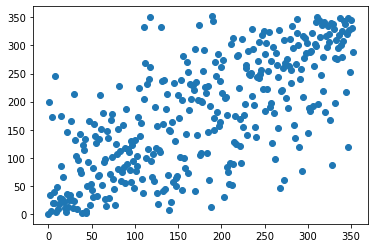

In [28]:
plt.scatter(human_rank, w2v_rank)
plt.show()

# 67

In [29]:
countries = {
    country
    for lst in dataset
    for country in [lst[2], lst[4]]
    if lst[0] in {'capital-common-countries', 'capital-world'}
} | {
    country
    for lst in dataset
    for country in [lst[1], lst[3]]
    if lst[0] in {'currency', 'gram6-nationality-adjective'}
}
countries = list(countries)
countries

['Greece',
 'Senegal',
 'Liberia',
 'Kyrgyzstan',
 'Netherlands',
 'Greenland',
 'Somalia',
 'Kenya',
 'Nigeria',
 'Jamaica',
 'Egypt',
 'France',
 'Uruguay',
 'Turkmenistan',
 'Mali',
 'Guinea',
 'Tunisia',
 'Dominica',
 'Liechtenstein',
 'Germany',
 'Venezuela',
 'Bulgaria',
 'Sudan',
 'Montenegro',
 'Turkey',
 'Laos',
 'Mexico',
 'Georgia',
 'Belarus',
 'Syria',
 'Mauritania',
 'Spain',
 'Israel',
 'Pakistan',
 'Lebanon',
 'Namibia',
 'Belize',
 'Norway',
 'Fiji',
 'Iran',
 'Nicaragua',
 'Cuba',
 'Ecuador',
 'Slovakia',
 'Canada',
 'Croatia',
 'Zambia',
 'Europe',
 'Belgium',
 'Uganda',
 'Zimbabwe',
 'Angola',
 'Rwanda',
 'Cyprus',
 'Guyana',
 'Burundi',
 'Bahamas',
 'Bangladesh',
 'Moldova',
 'Iraq',
 'Hungary',
 'Suriname',
 'Lithuania',
 'Eritrea',
 'Portugal',
 'Finland',
 'Australia',
 'Madagascar',
 'Malawi',
 'Vietnam',
 'Poland',
 'Kazakhstan',
 'Gabon',
 'Latvia',
 'Ghana',
 'Niger',
 'Algeria',
 'Honduras',
 'Ukraine',
 'Libya',
 'Serbia',
 'Macedonia',
 'Japan',
 'Estonia

In [30]:
country_vectors = [model[country] for country in countries]
countries[:5],country_vectors[:5]

(['Greece', 'Senegal', 'Liberia', 'Kyrgyzstan', 'Netherlands'],
 [memmap([ 0.47265625,  0.00701904,  0.05908203,  0.09033203,  0.03955078,
          -0.05859375,  0.06005859, -0.2578125 , -0.24121094, -0.04589844,
          -0.19238281, -0.16015625,  0.296875  , -0.10205078,  0.02416992,
          -0.01489258, -0.00558472, -0.07373047,  0.05957031,  0.09765625,
           0.27929688,  0.07470703,  0.37695312, -0.1875    ,  0.06884766,
           0.18066406, -0.06347656,  0.02722168, -0.06005859,  0.1640625 ,
          -0.09033203, -0.23828125,  0.12451172,  0.00118256, -0.1875    ,
          -0.17480469, -0.28320312,  0.01025391,  0.26953125, -0.00165558,
           0.09179688,  0.02709961,  0.265625  , -0.20117188, -0.03662109,
           0.08203125, -0.34375   , -0.03613281, -0.03735352, -0.01818848,
          -0.12695312,  0.35546875, -0.13183594, -0.02844238, -0.15234375,
          -0.08447266, -0.2734375 ,  0.2734375 , -0.22851562, -0.13378906,
           0.02392578, -0.12109375, 

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('クラス', i)
    print(', '.join([countries[k] for k in cluster]))

クラス 0
Greece, Netherlands, Greenland, France, Liechtenstein, Germany, Spain, Norway, Slovakia, Canada, Croatia, Europe, Belgium, Hungary, Portugal, Finland, Australia, Poland, Japan, Sweden, Ireland, Italy, Iceland, Switzerland, Denmark, England, Austria, USA, Slovenia, Malta, Korea
クラス 1
Egypt, Tunisia, Laos, Syria, Israel, Pakistan, Lebanon, Iran, Bangladesh, Iraq, Vietnam, Libya, China, Cambodia, Jordan, Indonesia, India, Morocco, Bhutan, Afghanistan, Nepal, Thailand, Qatar, Oman, Malaysia, Bahrain
クラス 2
Kyrgyzstan, Turkmenistan, Bulgaria, Montenegro, Turkey, Georgia, Belarus, Cyprus, Moldova, Lithuania, Kazakhstan, Latvia, Ukraine, Serbia, Macedonia, Estonia, Uzbekistan, Armenia, Tajikistan, Romania, Azerbaijan, Russia, Albania
クラス 3
Senegal, Liberia, Somalia, Kenya, Nigeria, Mali, Guinea, Sudan, Mauritania, Namibia, Zambia, Uganda, Zimbabwe, Angola, Rwanda, Burundi, Eritrea, Madagascar, Malawi, Gabon, Ghana, Niger, Algeria, Botswana, Gambia, Mozambique
クラス 4
Jamaica, Uruguay, Domi

In [34]:
countries_label = {}
for i in range(len(countries)):
    countries_label[countries[i]] = kmeans.labels_[i]
countries_label

{'Greece': 0,
 'Senegal': 3,
 'Liberia': 3,
 'Kyrgyzstan': 2,
 'Netherlands': 0,
 'Greenland': 0,
 'Somalia': 3,
 'Kenya': 3,
 'Nigeria': 3,
 'Jamaica': 4,
 'Egypt': 1,
 'France': 0,
 'Uruguay': 4,
 'Turkmenistan': 2,
 'Mali': 3,
 'Guinea': 3,
 'Tunisia': 1,
 'Dominica': 4,
 'Liechtenstein': 0,
 'Germany': 0,
 'Venezuela': 4,
 'Bulgaria': 2,
 'Sudan': 3,
 'Montenegro': 2,
 'Turkey': 2,
 'Laos': 1,
 'Mexico': 4,
 'Georgia': 2,
 'Belarus': 2,
 'Syria': 1,
 'Mauritania': 3,
 'Spain': 0,
 'Israel': 1,
 'Pakistan': 1,
 'Lebanon': 1,
 'Namibia': 3,
 'Belize': 4,
 'Norway': 0,
 'Fiji': 4,
 'Iran': 1,
 'Nicaragua': 4,
 'Cuba': 4,
 'Ecuador': 4,
 'Slovakia': 0,
 'Canada': 0,
 'Croatia': 0,
 'Zambia': 3,
 'Europe': 0,
 'Belgium': 0,
 'Uganda': 3,
 'Zimbabwe': 3,
 'Angola': 3,
 'Rwanda': 3,
 'Cyprus': 2,
 'Guyana': 4,
 'Burundi': 3,
 'Bahamas': 4,
 'Bangladesh': 1,
 'Moldova': 2,
 'Iraq': 1,
 'Hungary': 0,
 'Suriname': 4,
 'Lithuania': 2,
 'Eritrea': 3,
 'Portugal': 0,
 'Finland': 0,
 'Australia'

# 68

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

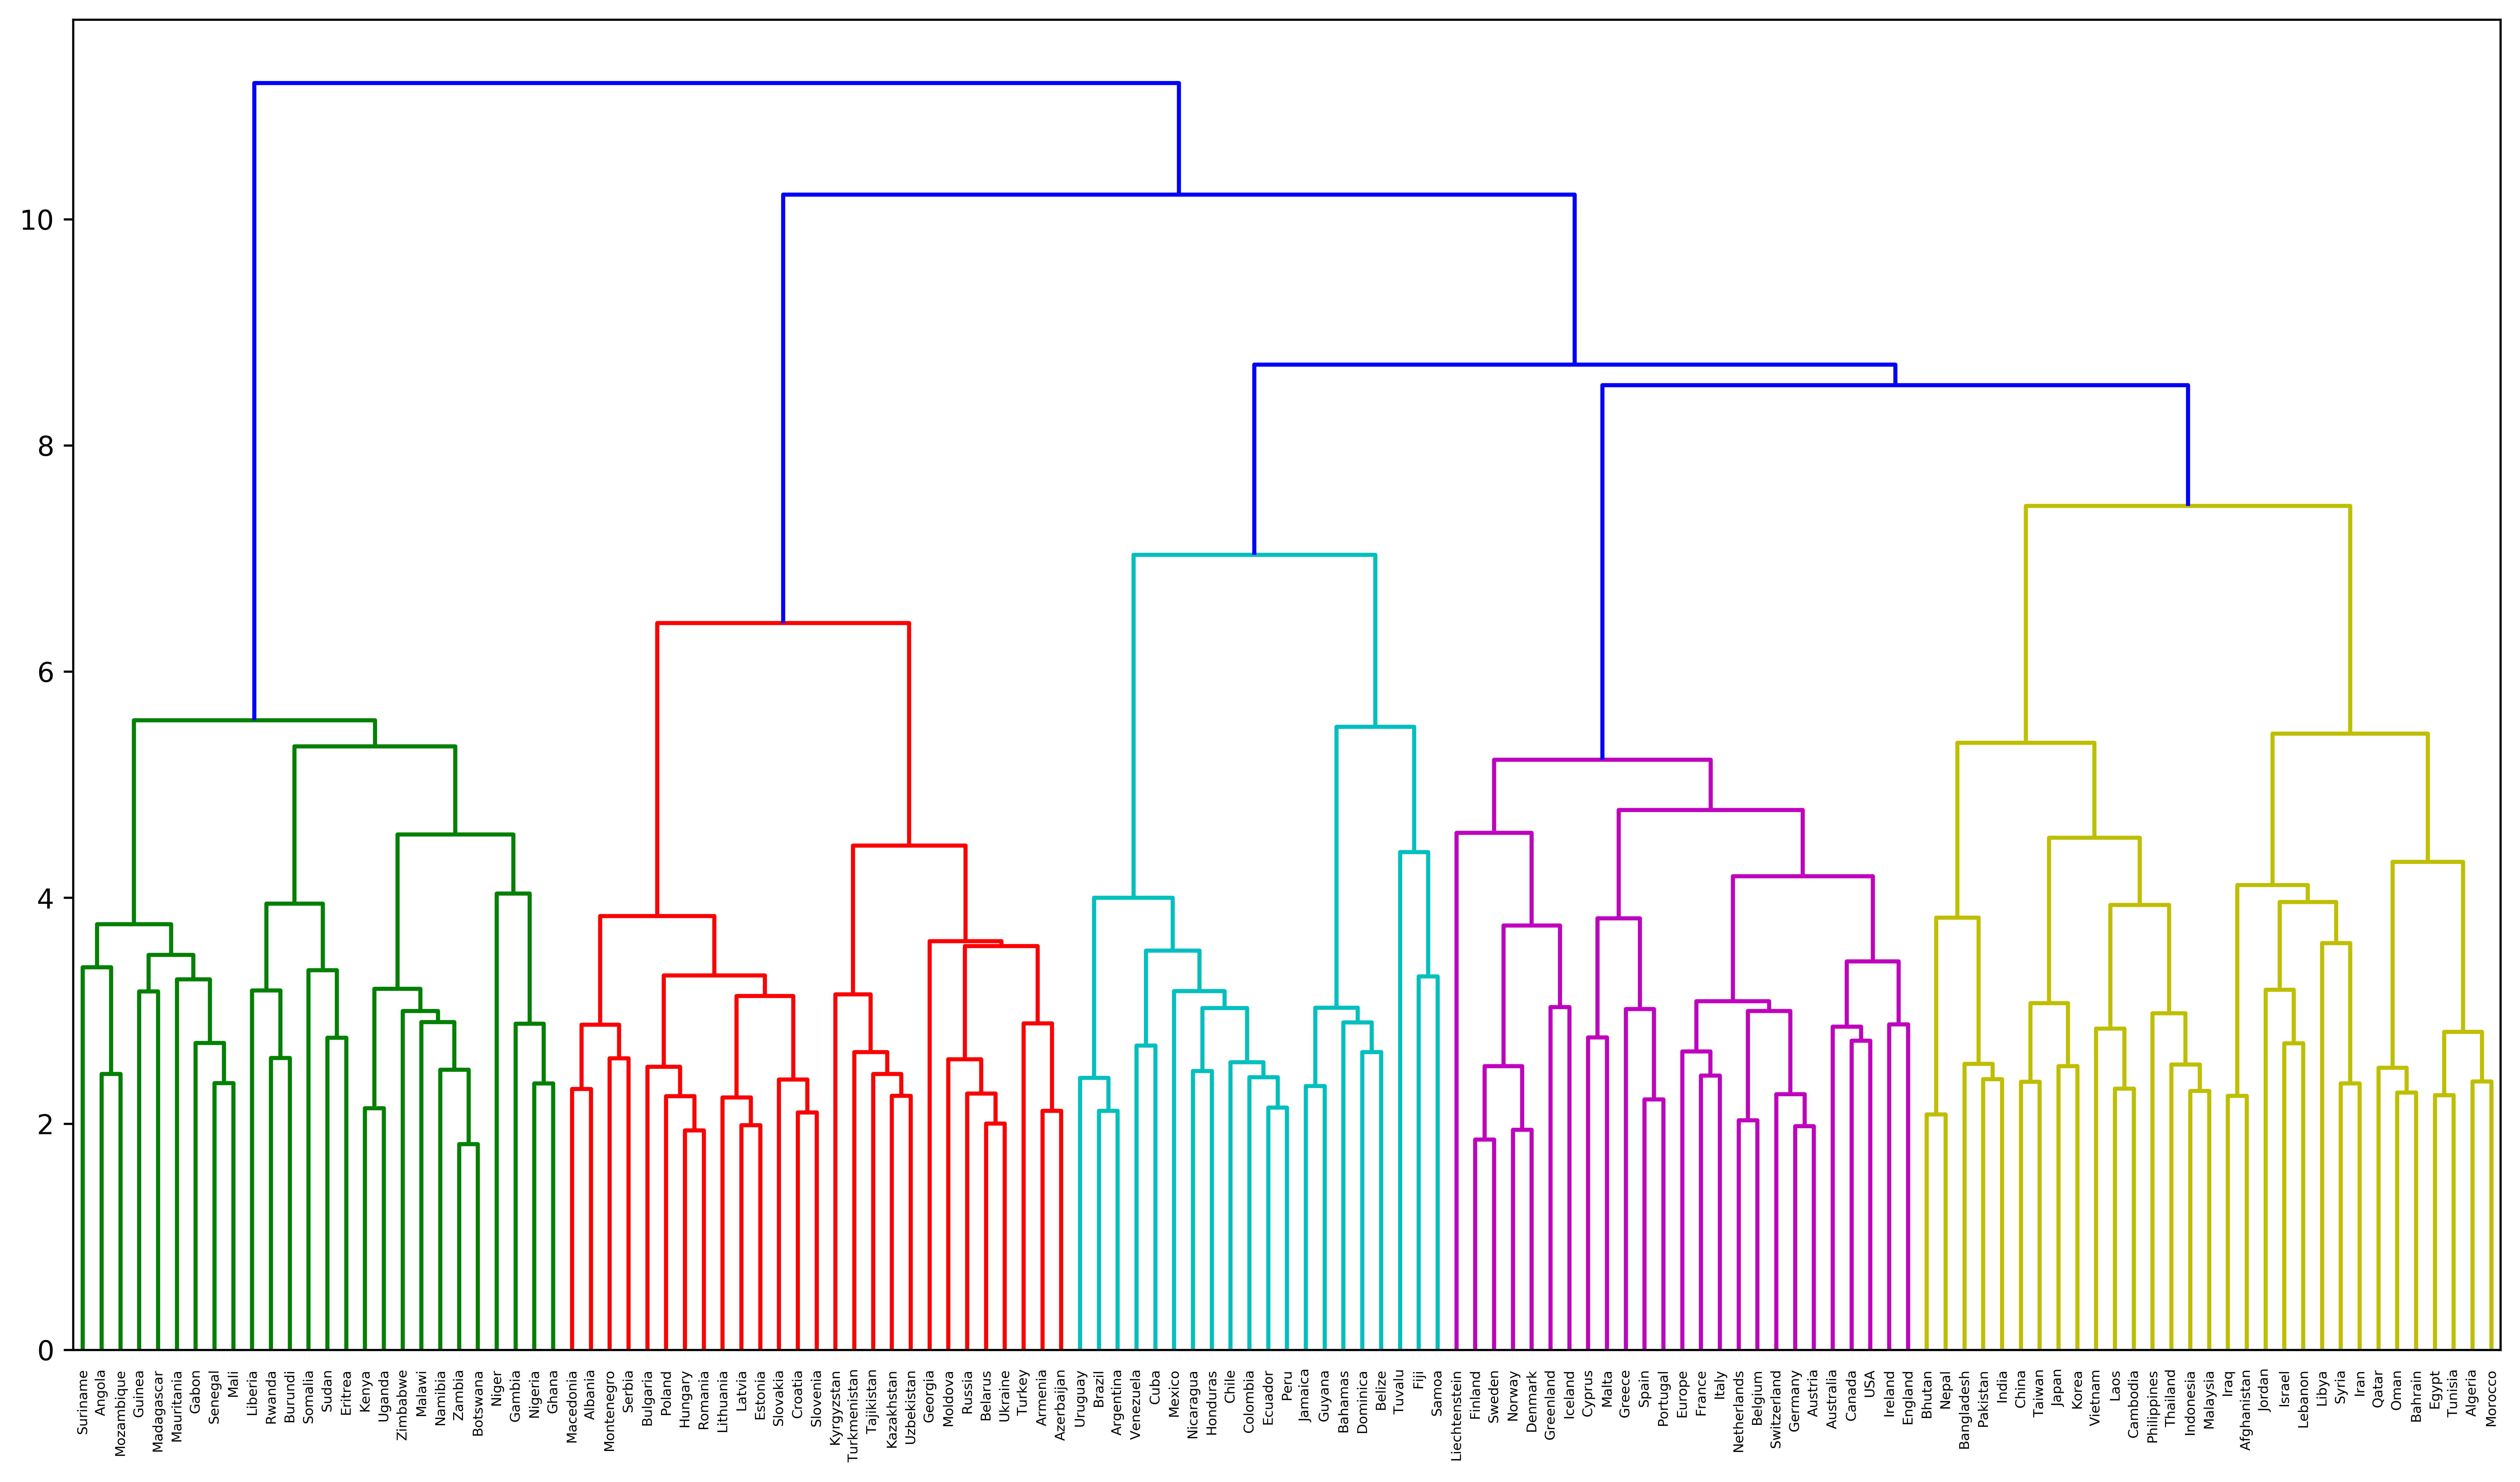

In [36]:
plt.figure(figsize=(16, 9), dpi=600)
Z = linkage(country_vectors, method='ward')
dendrogram(Z, labels = countries)
plt.savefig('68.jpg')
plt.show()

# 69

In [37]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [38]:
tsne = TSNE(n_components=2, perplexity=20, method="exact")
tsne.fit(country_vectors)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='exact', metric='euclidean', min_grad_norm=1e-07, n_components=2,
     n_iter=1000, n_iter_without_progress=300, n_jobs=None, perplexity=20,
     random_state=None, verbose=0)

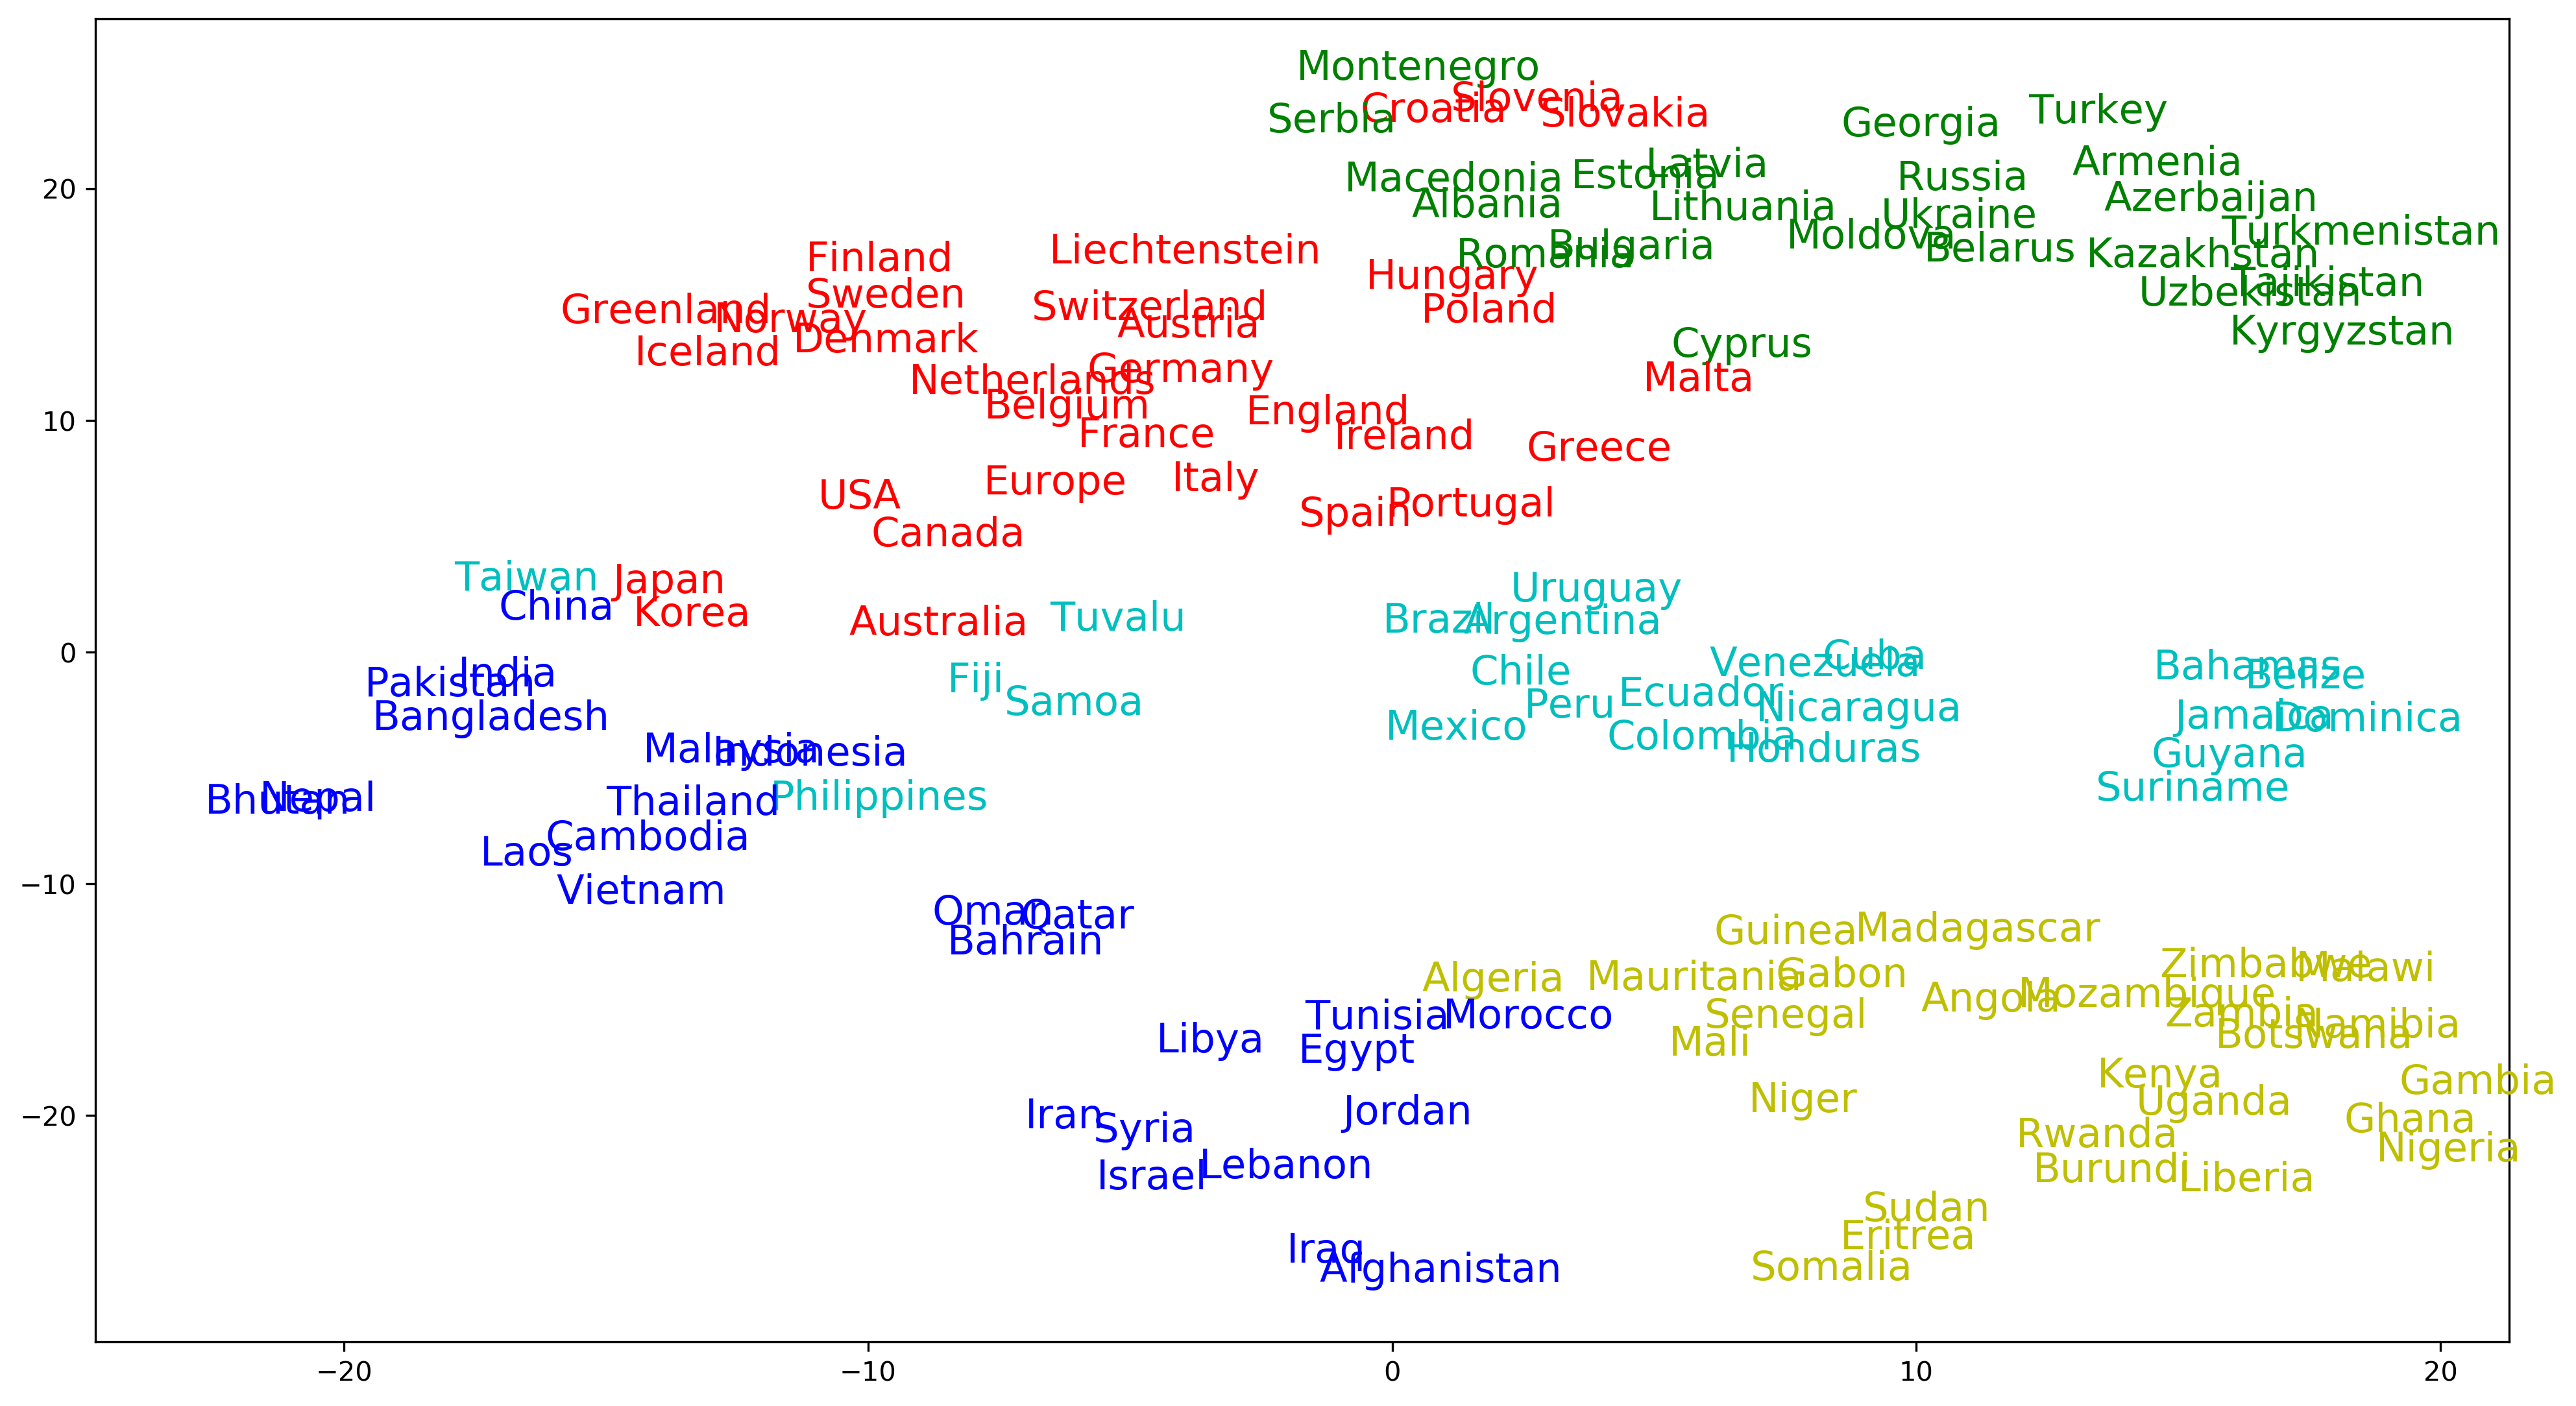

In [45]:
color = ['r', 'b', 'g', 'y', 'c']

plt.figure(figsize=(16, 9), dpi=300)
for (x, y), name in zip(tsne.embedding_, countries):
    plt.scatter(x, y, c=color[countries_label[name]], s=0)
    plt.annotate(name, (x, y), color=color[countries_label[name]], size=15)

plt.savefig('69.jpg')
plt.show()

In [ ]:
import bhtsne

In [ ]:
country_vectors_np = np.array(country_vectors, dtype=np.float64)

In [ ]:
bhtsne_fit = bhtsne.tsne(country_vectors_np, dimensions=2, perplexity=30)

In [ ]:
plt.figure(figsize=(15, 15), dpi=600)
plt.scatter(bhtsne_fit[:, 0], bhtsne_fit[:, 1],c=kmeans.labels_, s=100, cmap='brg')
for (x, y), name in zip(bhtsne_fit, countries):
    plt.annotate(name, (x, y))
plt.show()